In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import kid_readout.analysis.archive

/usr/lib/pymodules/python2.7/matplotlib/__init__.py:923: UserWarning:  This call to matplotlib.use() has no effect
because the the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  if warn: warnings.warn(_use_error_msg)


In [3]:
df = kid_readout.analysis.archive.build_simple_archives('/data/detectors/pkl/2015-02-03_*_led.pkl')

In [4]:
df.shape

(72, 89)

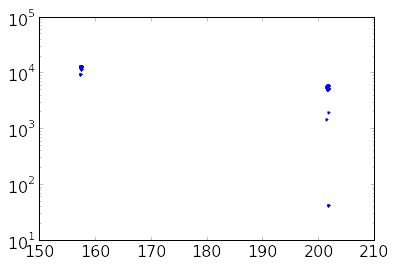

In [5]:
semilogy(df.f_0,df.Q,'.')

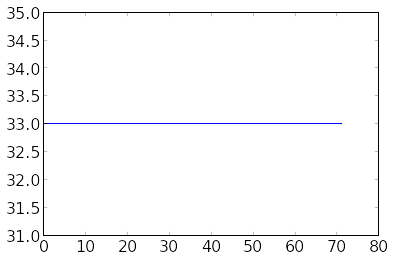

In [6]:
plot(df.atten)

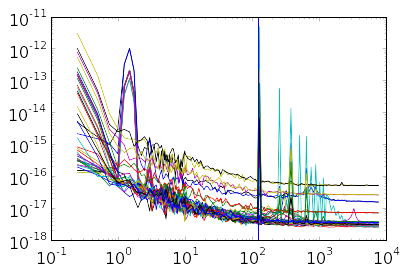

In [19]:
dd = df[(df.resonator_id==1)]
for k,row in dd.iterrows():
    loglog(row.pca_freq,row.pca_eigvals[1,:])
ax = gca()
ax.axvline(122)

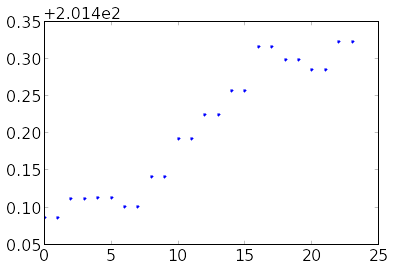

In [62]:
dd = df[(df.resonator_id==0) & (df.timestream_modulation_duty_cycle<1)]
plot(dd.f_0,'.')

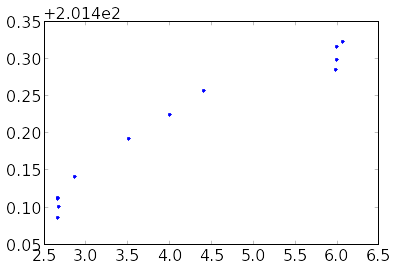

In [65]:
plot(dd.sweep_primary_package_temperature,dd.f_0,'.')

In [57]:
df.zbd_voltage

0     NaN
1     NaN
2     1.5
3     1.5
4     0.0
5     0.0
6     NaN
7     NaN
8     1.7
9     1.7
10    0.0
11    0.0
12    NaN
13    NaN
14    2.0
...
57    1.7
58    0.0
59    0.0
60    NaN
61    NaN
62    2.0
63    2.0
64    0.0
65    0.0
66    NaN
67    NaN
68    2.2
69    2.2
70    0.0
71    0.0
Name: zbd_voltage, Length: 72, dtype: float64

In [56]:
dd.timestream_modulation_freq

0     0
6     0
12    0
18    0
24    0
30    0
36    0
42    0
48    0
54    0
60    0
66    0
Name: timestream_modulation_freq, dtype: float64

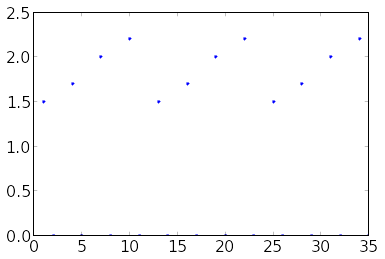

In [12]:
plot(dd.zbd_voltage,'.')

In [13]:
dd.shape

(2, 89)

In [20]:
dd.sweep_filename

83     /data/detectors/2015-05-02_110352.nc
171    /data/detectors/2015-05-02_125248.nc
Name: sweep_filename, dtype: object

In [44]:
pkl = kid_readout.analysis.archive.load_noise_pkl('/data/detectors/pkl/2015-02-03_120947_led.pkl')

In [45]:
snm = pkl[3]

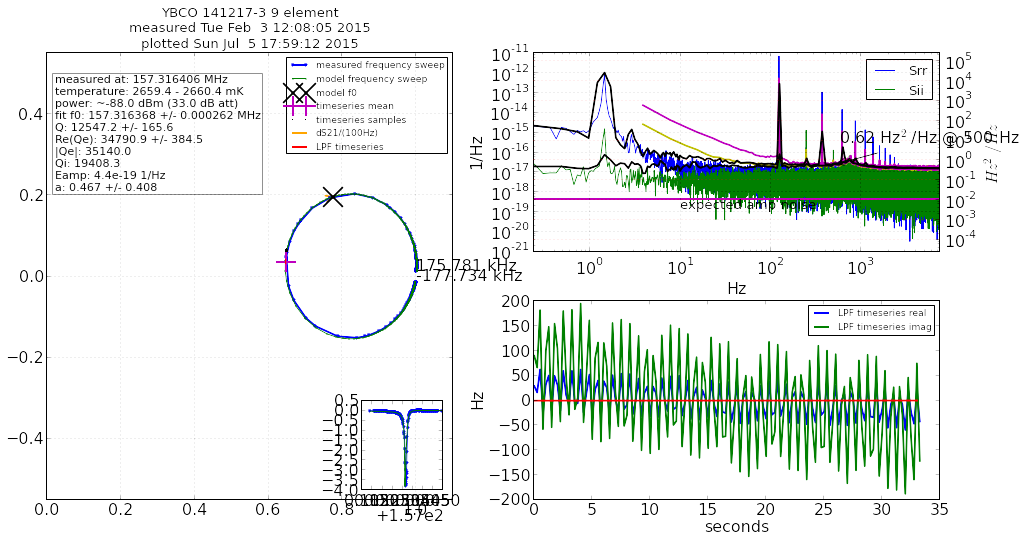

In [46]:
blah =snm.plot()

In [47]:
snm.zbd_voltage

2.0

In [48]:
[x.zbd_voltage for x in pkl]

[nan, nan, 2.0, 2.0, 0.0, 0.0]

In [34]:
len(pkl)

6

In [35]:
snm.fractional_fluctuation_timeseries.shape

(524288,)

In [36]:
import kid_readout.analysis.iqnoise

In [30]:
kid_readout.analysis.iqnoise.pca_noise??

In [52]:
fr,S,evals,evects,angles,piq = kid_readout.analysis.iqnoise.pca_noise(snm.fractional_fluctuation_timeseries,use_log_bins=False,Fs=snm.timeseries_sample_rate)

using NFFT: 2** 16.0


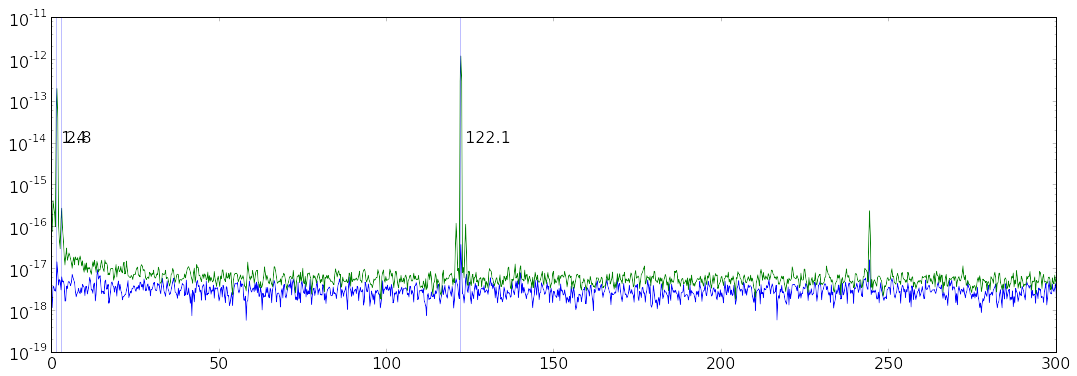

In [53]:
figure(figsize=(18,6))
semilogy(fr,evals.T)
xlim(0,300)
ax = gca()
for spur in [1.4,2.8,snm.timestream_modulation_freq]:
    ax.text(spur,1e-14,(' %.1f' % spur))
    ax.axvline(spur,alpha=0.5)

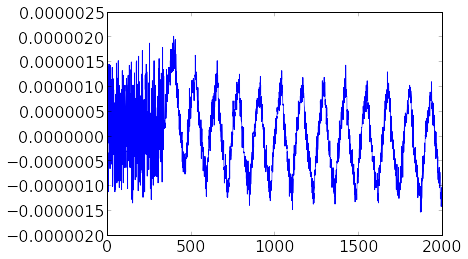

In [50]:
plot(snm.fractional_fluctuation_timeseries.real[:2000])

In [54]:
df.timestream_modulation_duty_cycle

0     0.0
1     0.0
2     0.5
3     0.5
4     1.0
5     1.0
6     0.0
7     0.0
8     0.5
9     0.5
10    1.0
11    1.0
12    0.0
13    0.0
14    0.5
...
57    0.5
58    1.0
59    1.0
60    0.0
61    0.0
62    0.5
63    0.5
64    1.0
65    1.0
66    0.0
67    0.0
68    0.5
69    0.5
70    1.0
71    1.0
Name: timestream_modulation_duty_cycle, Length: 72, dtype: float64